In [11]:
import pandas as pd
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
import copy, math
from sklearn.metrics import accuracy_score

In [12]:
df = pd.read_csv('motion.csv')
df

,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,pose
0,0.380623,0.422222,0.520505,0.391463,0.555705,0.546592,0
1,0.531719,0.397661,0.499474,0.448780,0.445638,0.400556,0
2,0.453287,0.380117,0.545741,0.446341,0.500671,0.347705,1
3,0.402537,0.425731,0.372240,0.478049,0.616107,0.534075,0
4,0.388697,0.191813,0.332282,0.245122,0.373154,0.221140,0
...,...,...,...,...,...,...,...
4645,0.442907,0.431579,0.537329,0.484146,0.571812,0.183588,1
4646,0.350634,0.447953,0.543638,0.534146,0.416107,0.550765,0
4647,0.522491,0.447953,0.595163,0.408537,0.445638,0.485396,1
4648,0.534025,0.417544,0.465825,0.429268,0.421477,0.502086,1


In [13]:
x = df.drop(['pose'], axis=1).values
y = df['pose'].values

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
def compute_loss(x, y, v, w):
    d = x.shape[0]
    k = len(v)
    loss = 0
    for i in range(d):
        hi = []
        for j in range(k):
            hi.append(sigmoid(np.dot(v[j],x[i])))
        fi = sigmoid(np.dot(w,hi))
        loss += (fi-y[i])**2
    loss = loss / d
    return loss

In [16]:
def compute_w(x, y, v, w, index): 
    d = x.shape[0]
    k = len(v)
    dw = 0 
    for i in range(d):
        hi = 0
        for j in range(k):
            hi += w[j]*sigmoid(np.dot(v[j],x[i]))
        fi = sigmoid(hi)
        dw += 2*(fi - y[i])*fi*(1-fi)*sigmoid(np.dot(v[index],x[i])) 
    dw = dw/d
    return dw

In [17]:
def compute_v(x, y, v, w, index): 
    d = x.shape[0]
    k = len(v)
    dv = 0 
    for i in range(d):
        zi = 0
        for j in range(k):
            zi += w[j]*sigmoid(np.dot(v[j],x[i]))
        fi = sigmoid(zi)
        dv += 2*(fi - y[i])*fi*(1-fi)*w[index]*sigmoid(np.dot(v[index],x[i]))*(1-sigmoid(np.dot(v[index],x[i])))*x[i] 
    dv = dv/d
    return dv

In [18]:
def gradient_descent(x, y, v, w, lr, iters): 
    loss = []
    for i in range(iters):
        dw = []
        for j in range(len(v)):
            dw.append(compute_w(x, y, v, w, j))
        for j in range(len(v)):
            w[j] = w[j] - lr * dw[j]
        dv = []
        for j in range(len(v)):
            dv.append(compute_v(x, y, v, w, j))
        for j in range(len(v)):
            v[j] = v[j] - lr * dv[j]   
        loss.append(compute_loss(x, y, v, w))
    return v, w, loss

In [19]:
v = []
v.append(np.zeros_like(x[0]))
v.append(np.zeros_like(x[0]))
w = np.zeros(2)
v, w, l1 = gradient_descent(x, y, v, w, 0.01, 1000) 
print(v[0])
print(v[1])
print(w)

[-2.32805985e-08 -5.74907743e-08 -7.44679280e-07 -1.22950509e-06
 -1.20523176e-06 -1.04708745e-06]
[-2.32805985e-08 -5.74907743e-08 -7.44679280e-07 -1.22950509e-06
 -1.20523176e-06 -1.04708745e-06]
[-0.0011996 -0.0011996]


In [21]:
v = []
v.append(np.random.rand(x[0].shape[0]))
v.append(np.random.rand(x[0].shape[0]))
w = np.random.rand(2)
v, w, l2 = gradient_descent(x, y, v, w, 0.01, 1000) 
print(v[0])
print(v[1])
print(w)

[0.44779755 0.53158452 0.50790246 0.94479688 0.41146092 0.48703344]
[0.32934763 0.23544278 0.83442108 0.14601462 0.17884622 0.02308704]
[ 0.318049   -0.15848847]


In [22]:
iterations = np.arange(1000)

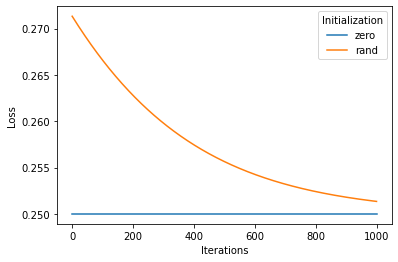

In [23]:
plt.plot(iterations, l1)
plt.plot(iterations, l2)
plt.legend(['zero','rand'],title='Initialization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [30]:
v = []
v.append(np.random.rand(x[0].shape[0]))
v.append(np.random.rand(x[0].shape[0]))
w = np.random.rand(2)
v_n, w_n, l1 = gradient_descent(x, y, v, w, 0.1, 1000) 
print(v_n[0])
print(v_n[1])
print(w_n)

[0.29678535 0.49545851 0.40443131 0.48314283 0.59019665 0.24092498]
[0.67072584 0.96576915 0.73687151 0.20604477 0.14924962 0.60685371]
[ 0.03971084 -0.0362402 ]


In [31]:
v_n, w_n, l2 = gradient_descent(x, y, v, w, 0.05, 1000) 
print(v_n[0])
print(v_n[1])
print(w_n)

[0.29670265 0.4954128  0.40444953 0.48333427 0.59043973 0.24107026]
[0.67078283 0.96576477 0.73683741 0.20598831 0.149165   0.60668325]
[ 0.04067423 -0.037131  ]


In [32]:
v_n, w_n, l3 = gradient_descent(x, y, v, w, 0.01, 1000) 
print(v_n[0])
print(v_n[1])
print(w_n)

[0.29668587 0.49540352 0.40445322 0.4833731  0.59048903 0.24109973]
[0.6707944  0.96576388 0.73683048 0.20597686 0.14914782 0.60664866]
[ 0.04086713 -0.03730939]


In [33]:
v_n, w_n, l4 = gradient_descent(x, y, v, w, 0.005, 1000) 
print(v_n[0])
print(v_n[1])
print(w_n)

[0.29667745 0.49539886 0.40445507 0.48339259 0.59051377 0.24111452]
[0.6708002  0.96576343 0.73682701 0.20597111 0.14913921 0.60663131]
[ 0.04096361 -0.0373986 ]


In [34]:
v_n, w_n, l5 = gradient_descent(x, y, v, w, 0.001, 1000) 
print(v_n[0])
print(v_n[1])
print(w_n)

[0.29667576 0.49539793 0.40445544 0.48339649 0.59051873 0.24111748]
[0.67080136 0.96576334 0.73682631 0.20596995 0.14913748 0.60662783]
[ 0.0409829  -0.03741645]


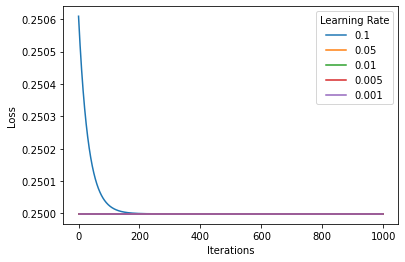

In [35]:
plt.plot(iterations, l1)
plt.plot(iterations, l2)
plt.plot(iterations, l3)
plt.plot(iterations, l4)
plt.plot(iterations, l5)
plt.legend(['0.1','0.05','0.01','0.005','0.001'],title='Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [38]:
v_n, w_n, l1 = gradient_descent(x_test, y_test, v, w, 0.1, 1000) 
print(v_n[0])
print(v_n[1])
print(w_n)

[0.29652825 0.49617614 0.4032995  0.48381152 0.59314701 0.24195949]
[0.67074719 0.9656993  0.73678212 0.20592329 0.14904991 0.60656029]
[ 0.08447526 -0.0016232 ]


In [42]:
def pred(x):
    v = [np.array([0.29652825, 0.49617614, 0.4032995,  0.48381152, 0.59314701, 0.24195949]),np.array([0.67074719, 0.9656993,  0.73678212, 0.20592329, 0.14904991, 0.60656029])]
    w = np.array([ 0.08447526, -0.0016232 ])
    k = 2
    preds = []
    for i in range(len(x)):
        hi = []
        for j in range(k):
            hi.append(sigmoid(np.dot(v[j],x[i])))
        fi = sigmoid(np.dot(w,hi))
        if (fi>=0.5):
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [43]:
y_preds = np.array(pred(x_test))

In [44]:
accuracy_score(y_test, y_preds)

0.5146953405017921